```
From: https://github.com/ksatola
Version: 0.1.0
```

# Exploratory Data Analysis (EDA) of PM2.5 

This Exploratory Data Analysis (EDA) covers particulate matter (PM) air pollutants with a special focus on fine particles (PM2.5) which are considered as the most harmful out of all air-pollutants. The measuresements under EDA were taken in Krakow area in the years of 2008-2018.

In [1]:
import pandas as pd 
import numpy as np
#import sqlite3
#from sqlalchemy import create_engine

#import statsmodels.api as sm
#from statsmodels.tsa.seasonal import seasonal_decompose
#from statsmodels.tsa.seasonal import STL
#from statsmodels.tsa.stattools import adfuller
#from pandas.plotting import autocorrelation_plot
#from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Load the dataset
data_path = '../data/final/'
data_file = data_path + 'dfpm2008_2018.csv'
df = pd.read_csv(data_file, encoding='utf-8', sep=",", index_col="Datetime")
df.head()

,pm10,pm25
Datetime,,
2008-01-01 01:00:00,109.5,92.0
2008-01-01 02:00:00,96.0,81.0
2008-01-01 03:00:00,86.5,73.0
2008-01-01 04:00:00,71.5,60.5
2008-01-01 05:00:00,72.0,61.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96388 entries, 2008-01-01 01:00:00 to 2019-01-01 00:00:00.000
Data columns (total 2 columns):
pm10    96388 non-null float64
pm25    96388 non-null float64
dtypes: float64(2)
memory usage: 2.2+ MB


In [6]:
df.isnull().sum()

pm10    0
pm25    0
dtype: int64

**The data set contains hourly measurements of particulate matter (PM10) and fine particles (PM2.5) taken in Krakow area in the years of 2008-2018. There are 96 388 observations and no missing data.**

In [7]:
df.index

Index(['2008-01-01 01:00:00', '2008-01-01 02:00:00', '2008-01-01 03:00:00',
       '2008-01-01 04:00:00', '2008-01-01 05:00:00', '2008-01-01 06:00:00',
       '2008-01-01 07:00:00', '2008-01-01 08:00:00', '2008-01-01 09:00:00',
       '2008-01-01 10:00:00',
       ...
       '2018-12-31 15:00:00.000', '2018-12-31 16:00:00.000',
       '2018-12-31 17:00:00.000', '2018-12-31 18:00:00.000',
       '2018-12-31 19:00:00.000', '2018-12-31 20:00:00.000',
       '2018-12-31 21:00:00.000', '2018-12-31 22:00:00.000',
       '2018-12-31 23:00:00.000', '2019-01-01 00:00:00.000'],
      dtype='object', name='Datetime', length=96388)

In [14]:
# Konwersja indexu na typ DateTime z generycznego typu object
df.index = pd.to_datetime(df.index)

In [15]:
df.index

DatetimeIndex(['2008-01-01 01:00:00', '2008-01-01 02:00:00',
               '2008-01-01 03:00:00', '2008-01-01 04:00:00',
               '2008-01-01 05:00:00', '2008-01-01 06:00:00',
               '2008-01-01 07:00:00', '2008-01-01 08:00:00',
               '2008-01-01 09:00:00', '2008-01-01 10:00:00',
               ...
               '2018-12-31 15:00:00', '2018-12-31 16:00:00',
               '2018-12-31 17:00:00', '2018-12-31 18:00:00',
               '2018-12-31 19:00:00', '2018-12-31 20:00:00',
               '2018-12-31 21:00:00', '2018-12-31 22:00:00',
               '2018-12-31 23:00:00', '2019-01-01 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=96388, freq=None)

In [16]:
# Podstawowe statystyki
df.describe()

,pm10,pm25
count,96388.000000,96388.000000
mean,53.538890,37.196145
std,48.546855,38.605214
min,3.000000,2.500000
25%,23.000000,13.699700
50%,38.000000,24.100000
75%,65.000000,45.000000
max,546.000000,445.000000


In [17]:
df['pm10'].idxmax(), df['pm25'].idxmax()

(Timestamp('2010-01-27 06:00:00'), Timestamp('2010-01-27 06:00:00'))

**Mediana wartosci stezenia pylow zawieszonych na przestrzeni 10 lat (2008-2018) wyniosla 38 dla PM10 oraz 24 dla PM2.5. Stezenia te podawane są w mikrogramach na metr sześcienny [µg/m3]. Polowa zaobserwowanych wartosci stezenia pylow w powietrzu jest bliska (PM10) lub przekracza (PM2.5) srednioroczna norme zdefiniowana przez WHO.**

**Maksymalne zaobserowane stezenia obu pylow (odpowiednio 546 i 445) mialy miejsce 27 stycznia 2010 roku o godzinie 6 rano.**

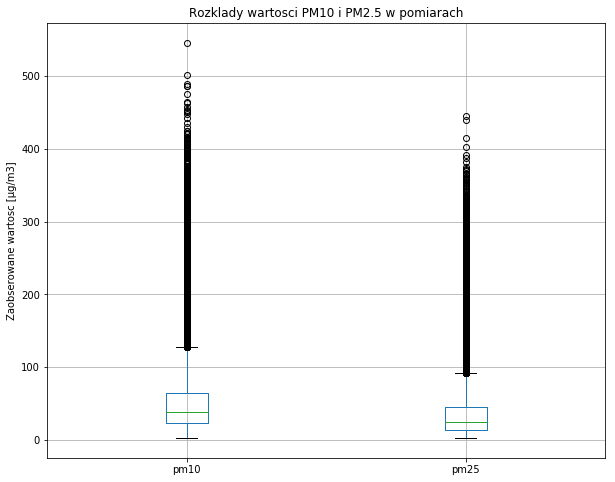

In [18]:
df.boxplot(grid=True, figsize=(10, 8))
plt.title('Rozklady wartosci PM10 i PM2.5 w pomiarach')
plt.ylabel('Zaobserowane wartosc [µg/m3]')
plt.show();

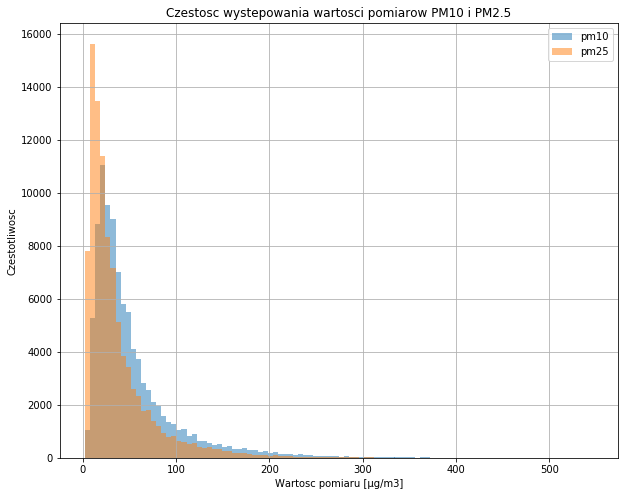

In [19]:
df.plot(kind='hist', bins=100, grid=True, figsize=(10, 8), alpha=0.5)
plt.title('Czestosc wystepowania wartosci pomiarow PM10 i PM2.5')
plt.xlabel('Wartosc pomiaru [µg/m3]')
plt.ylabel('Czestotliwosc')
plt.show();

**Rozklady wartosci zanieczyszczen sa podobne (prawoskosne) i charakteryzuja sie duza liczba wartosci odstajacych. Wszystkie one odstaja w gore, wielokrotnie przkraczajac zdefiniowane przez WHO normy stezenia PM10 i PM2.5.**

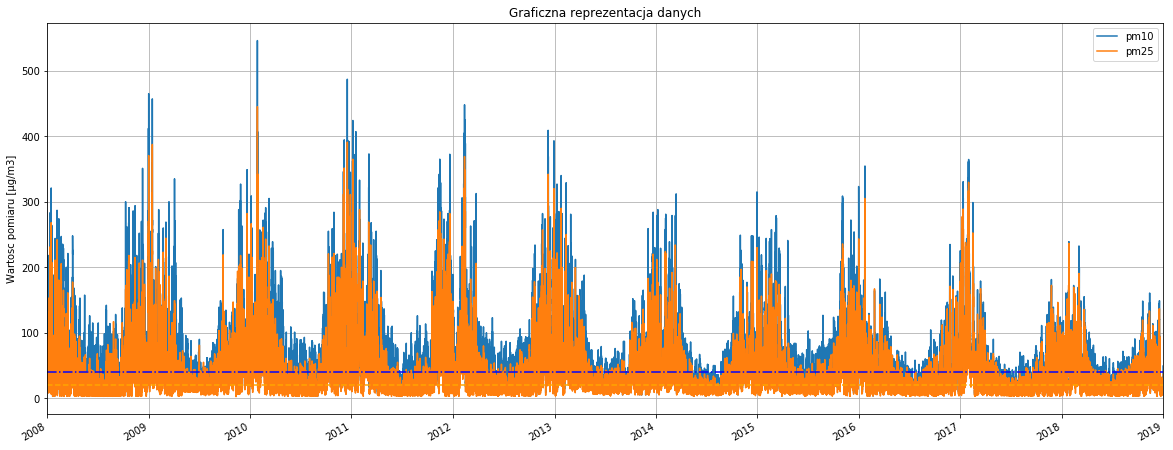

In [20]:
ax = df.plot(grid=True, figsize=(20, 8), alpha=1)
ax.axhline(20, color='orange', linestyle='--')
ax.axhline(40, color='blue', linestyle='-.')
plt.title('Graficzna reprezentacja danych')
plt.ylabel('Wartosc pomiaru [µg/m3]')
plt.xlabel('')
plt.show();

**Na wykresie obrazujacym wszystkie analizowane dane, mozna zaobserwowac sezonowosc w cyklu rocznym, ze znacznym wzrostem wartosci na przelomie kazdego roku (pazdziernik-kwiecien). Stezenia pylow PM10 oraz PM2.5 maja podobny rozklad, co do wartosci stezenie pylu PM10 nieznacznie dominuje nad PM2.5.** 

**Najwieksze maksymalne stezenia zaobserwowano na przestrzeni lat 2009-2011.**

**Na wykresie zaznaczono liniami poziomymi normy stezen dla PM10 (niebieska) oraz PM2.5 (pomaranczowa). Przez wieksza czesc roku, poziom stezenia pylow zawieszonych w powietrzu w Krakowie przekracza normy przyjete przez WHO.**

In [21]:
# Srednia PM10, PM2.5 w 2008
m2008 = df['2008'].mean()
m2008

pm10    58.658482
pm25    35.409081
dtype: float64

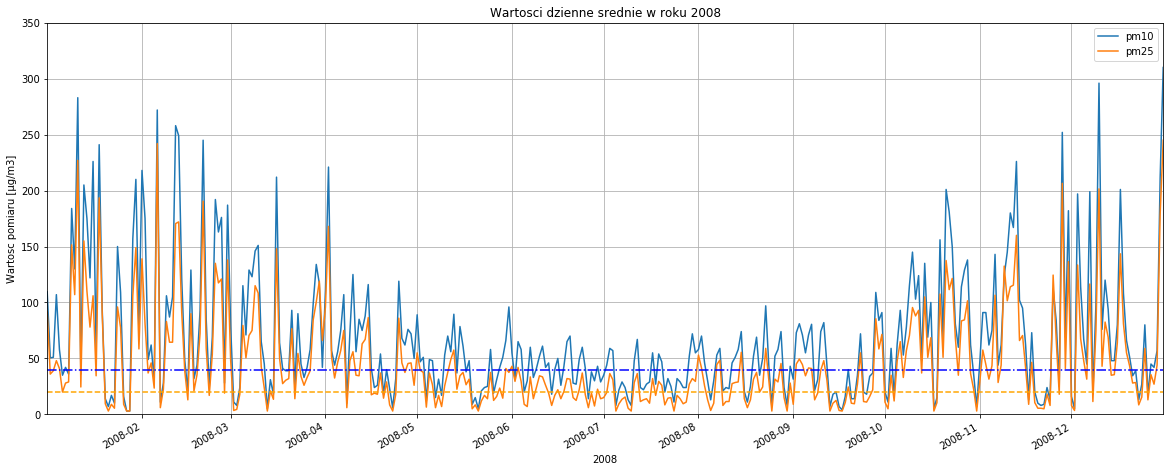

In [22]:
# Wartosci dzienne srednie w roku 2008
ax = df['2008'].asfreq('D').plot(grid=True, figsize=(20, 8))
ax.set_ylim(0, 350)
ax.axhline(20, color='orange', linestyle='--')
ax.axhline(40, color='blue', linestyle='-.')
plt.title('Wartosci dzienne srednie w roku 2008')
plt.ylabel('Wartosc pomiaru [µg/m3]')
plt.xlabel('2008')
plt.show();

In [23]:
# Srednia PM10, PM2.5 w 2018
m2018 = df['2018'].mean()
m2018

pm10    40.703388
pm25    30.840038
dtype: float64

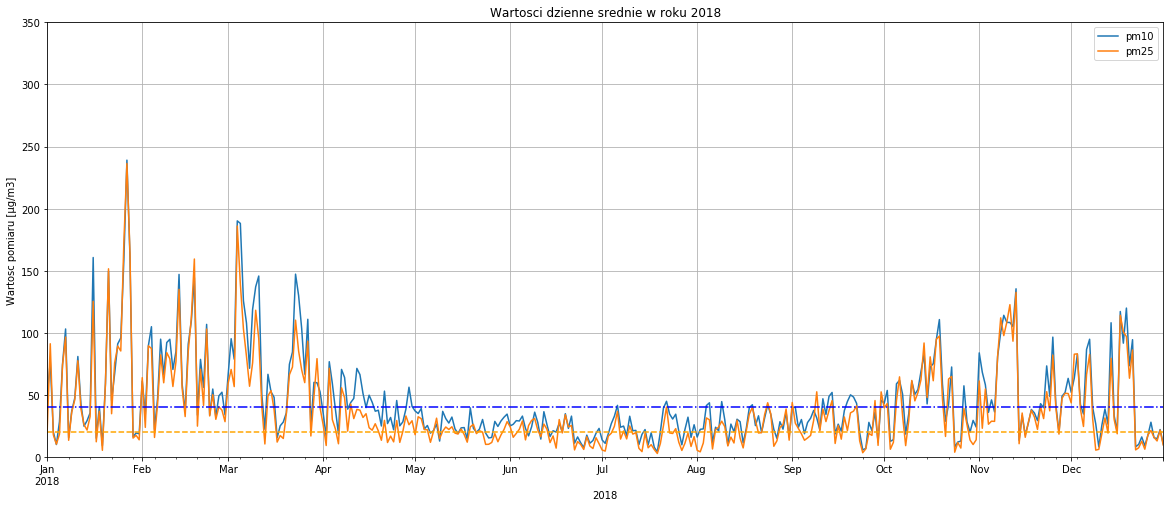

In [24]:
# Oraz w roku 2018
ax = df['2018'].asfreq('D').plot(grid=True, figsize=(20, 8))
ax.set_ylim(0, 350)
ax.axhline(20, color='orange', linestyle='--')
ax.axhline(40, color='blue', linestyle='-.')
plt.title('Wartosci dzienne srednie w roku 2018')
plt.ylabel('Wartosc pomiaru [µg/m3]')
plt.xlabel('2018')
plt.show();

**Takze w obrebie poszczegolnych lat (sprawdzono lata brzegowe: 2008 oraz 2018), miesieczny rozklad stezenia zanieczyszczen wyglada podobnie dla obu rodzajow pylow. W miesiacach zimowych, stezenie pylow w powietrzu jest znacznie wyzsze niz w miesiacach charakteryzujacych sie srednio wyzsza temperatura powietrza. Nalezy jednak zwrocic uwage na wartosci na osi pionowej, w roku 2018 srednie dzienne stezenia pylow zawieszonych sa nizsze niz w roku 2008.**

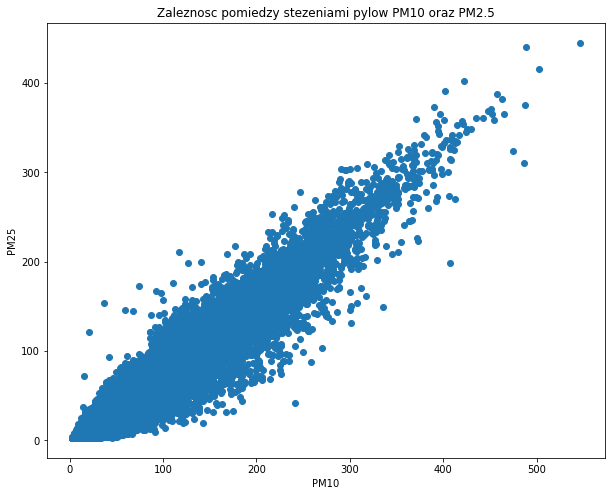

In [25]:
# Sprawdzmy czy istnieje liniowa zaleznosc miedzy wartosciami obserwacji PM10 i PM2.5
plt.figure(figsize=(10, 8))
plt.title("Zaleznosc pomiedzy stezeniami pylow PM10 oraz PM2.5")
plt.xlabel('PM10')
plt.ylabel('PM25')
plt.scatter(df['pm10'], df['pm25']);

**Powyzszy wykres pokazuje, ze rzeczywiscie wystepuje liniowa zaleznosc (korelacja dodatnia) miedzy stezeniami pylow PM10 oraz PM2.5. Gdy rosnie stezenie pylu PM10, proporcjonalnie rosnie rowniez stezenie pylu PM2.5.**

In [26]:
corr = df['pm10'].corr(df['pm25'])
print("Wspolczynnik korelacji poziomow zanieczyszczen PM10 oraz PM2.5 wynosi: ", corr)

Wspolczynnik korelacji poziomow zanieczyszczen PM10 oraz PM2.5 wynosi:  0.9639339988579074


**Wspolczynnik korelacji (metoda Pearsona) jest bardzo wysoki (maksymalna mozliwa wartosc to 1.00). Jest to oczekiwane, gdyz pyl PM2.5 jest drobniejszą frakcja pylu PM10 i wchodzi w jego sklad.**

### Pytanie 1
**Jakie byly roczne srednie stezenia poziomow pylow zawieszonych w Krakowie?**

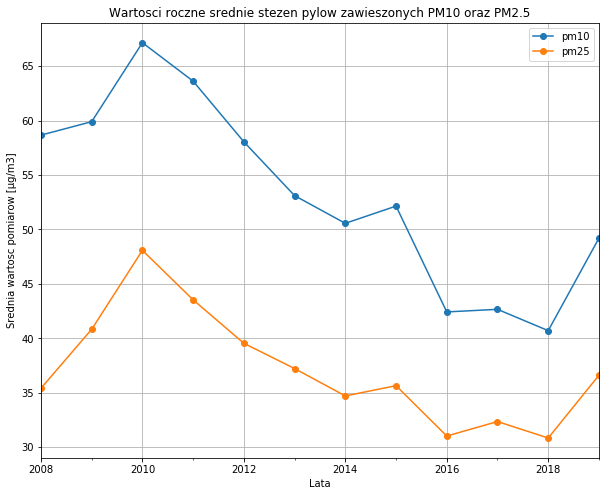

In [27]:
# Roczna srednia
dfts = df.resample(rule='A').mean()
dfts.plot(grid=True, figsize=(10, 8), marker='o')
plt.title('Wartosci roczne srednie stezen pylow zawieszonych PM10 oraz PM2.5')
plt.ylabel('Srednia wartosc pomiarow [µg/m3]')
plt.xlabel('Lata')
plt.show();

In [28]:
# Inna metoda
index_year = df.index.year
mean_by_year = df.groupby(index_year).mean()
mean_by_year

,pm10,pm25
Datetime,,
2008,58.658482,35.409081
2009,59.894241,40.826877
2010,67.148990,48.076949
2011,63.615723,43.532485
2012,58.044864,39.541272
2013,53.102708,37.220781
2014,50.559304,34.705822
2015,52.142013,35.649061
2016,42.422487,31.024153


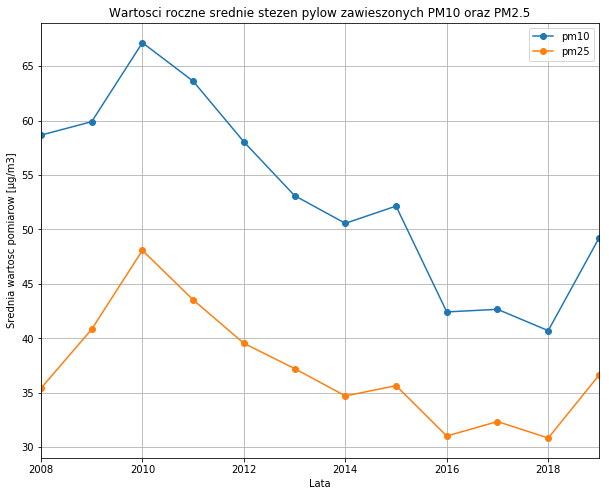

In [29]:
mean_by_year.plot(grid=True, figsize=(10, 8), marker='o')
plt.title('Wartosci roczne srednie stezen pylow zawieszonych PM10 oraz PM2.5')
plt.ylabel('Srednia wartosc pomiarow [µg/m3]')
plt.xlabel('Lata')
plt.show();

**W roku 2010 w Krakowie zaobserwowano rekordowe srednie dzienne wartosci stezen pylow zawieszonych. W latach kolejnych sytuacja zaczela sie poprawiac. Jednak w roku 2018 zaobserwowac mozna ponowny wzrost ilosci pylow zawieszonych w powietrzu.**

### Pytanie 2
**W jaki sposob ksztaltuje sie zmiennosc wartosci maksymalnych, minimalnych i mediany na przestrzeni lat dla PM2.5?**

In [30]:
dfts = df['pm25'].resample(rule='D').mean().to_frame()
rolling = dfts.pm25.rolling(360)
dfts['q10'] = rolling.quantile(0.1)
dfts['q50'] = rolling.quantile(0.5)
dfts['q90'] = rolling.quantile(0.9)
dfts.head()

,pm25,q10,q50,q90
Datetime,,,,
2008-01-01,53.586957,NaN,NaN,NaN
2008-01-02,30.958333,NaN,NaN,NaN
2008-01-03,46.104167,NaN,NaN,NaN
2008-01-04,42.979167,NaN,NaN,NaN
2008-01-05,57.312500,NaN,NaN,NaN


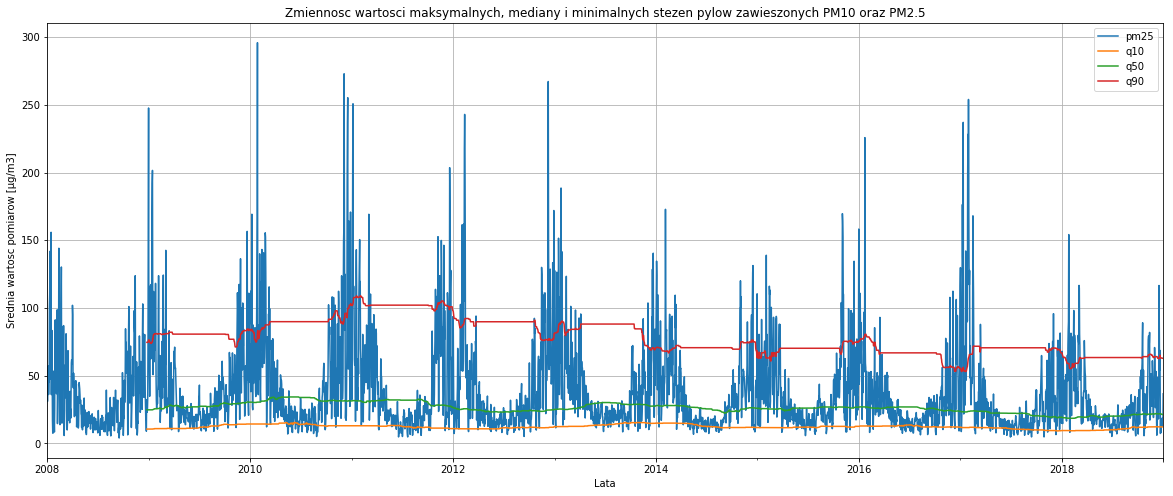

In [31]:
dfts.plot(grid=True, figsize=(20, 8))
plt.title('Zmiennosc wartosci maksymalnych, mediany i minimalnych stezen pylow zawieszonych PM10 oraz PM2.5')
plt.ylabel('Srednia wartosc pomiarow [µg/m3]')
plt.xlabel('Lata')
plt.show();

**Za pomoca kwantyli kroczacych (obejmujacych 360 dni) 10%, 50% (mediana) i 90% mozna zwizualizowac trendy zmiennosci wartosci maksymalnych, minimalnych i mediany. Jak widac, roczne maksymalne wartosci obserwowanych zanieczyszczen systematycznie spadaja, natomiast mediana i wartosci niskie pozostaja na podobnym poziomie.**

### Pytanie 3
**Jak ksztaltowaly sie sredniomiesieczne poziomy pylow zawieszonych na przelomie 2017 oraz 2018?**

In [32]:
dfts = df['2017-10':'2018-4'].resample(rule='M').mean()

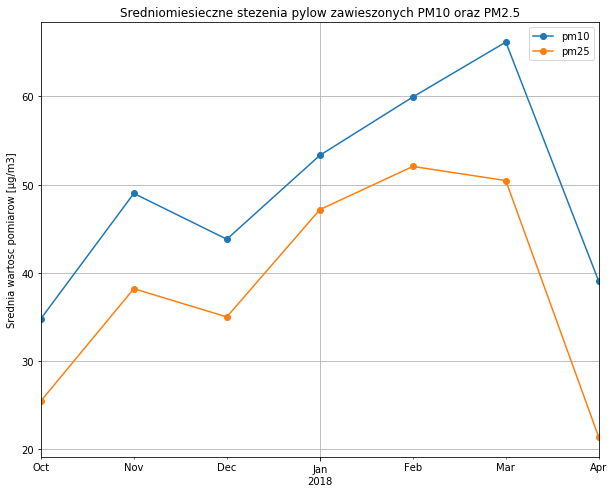

In [33]:
dfts.plot(grid=True, figsize=(10, 8), marker='o')
plt.title('Sredniomiesieczne stezenia pylow zawieszonych PM10 oraz PM2.5')
plt.ylabel('Srednia wartosc pomiarow [µg/m3]')
plt.xlabel('')
plt.show();

### Pytanie 4
**W jakich godzinach nalezy spodziewac sie najwiekszego sredniego stezenia pylow zawieszonych w powietrzu?**

In [34]:
index_hour = df.index.hour
mean_by_hour = df.groupby(index_hour).mean()
mean_by_hour

,pm10,pm25
Datetime,,
0,65.142781,48.841168
1,62.239097,47.202120
2,58.849983,44.983076
3,55.637367,42.564447
4,53.086791,40.324473
5,52.555740,39.261994
6,53.447625,38.949145
7,54.969955,38.525071
8,55.829887,37.592334


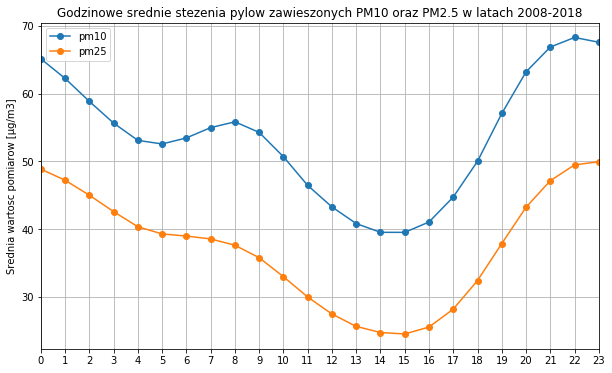

In [35]:
mean_by_hour.plot(grid=True, figsize=(10, 6), marker='o')
plt.xticks(mean_by_hour.index)
plt.title('Godzinowe srednie stezenia pylow zawieszonych PM10 oraz PM2.5 w latach 2008-2018')
plt.ylabel('Srednia wartosc pomiarow [µg/m3]')
plt.xlabel('')
plt.show();

**Najwyzsze zanieczyszczenie powietrza obserwowano w godzinach nocnych, najnizsze miedzy godz. 14:00 i 15:00.**

### Pytanie 5
**W ktore dni tygodnia nalezy spodziewac sie najwiekszego sredniego stezenia pylow zawieszonych w powietrzu?**

In [36]:
# Poniedzialek = 0
index_dayofweek = df.index.dayofweek
mean_by_dayofweek = df.groupby(index_dayofweek).mean()
mean_by_dayofweek

,pm10,pm25
Datetime,,
0,50.658805,34.724517
1,57.097404,39.140010
2,56.142090,38.327821
3,54.994405,37.513760
4,55.690797,38.219692
5,52.079464,37.304929
6,48.113621,35.144516


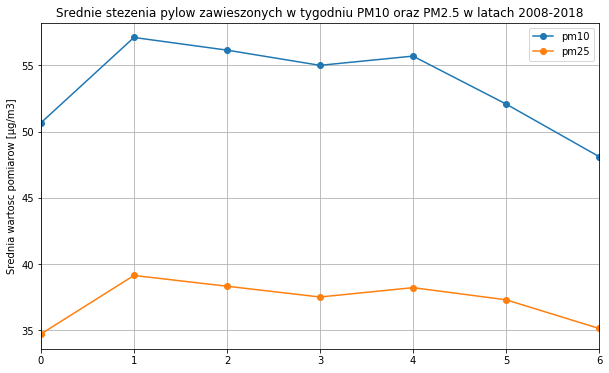

In [37]:
mean_by_dayofweek.plot(grid=True, figsize=(10, 6), marker='o')
plt.title('Srednie stezenia pylow zawieszonych w tygodniu PM10 oraz PM2.5 w latach 2008-2018')
plt.ylabel('Srednia wartosc pomiarow [µg/m3]')
plt.xlabel('')
plt.show();

**Poziom zanieczyszczenia jest srednio najwiekszy we wtorki (1), potem spada by osiagnac najnizsza srednia wartosc w niedziele (6).**

### Pytanie 6
**W ktorych miesiacach oddychamy najmniej zanieczyszczonym powietrzem?**

In [38]:
index_month = df.index.month
mean_by_month = df.groupby(index_month).mean()
mean_by_month

,pm10,pm25
Datetime,,
1,85.717663,65.816152
2,83.228053,61.435132
3,66.571877,45.508039
4,49.623295,30.178337
5,32.044806,19.652018
6,27.986224,16.111411
7,27.395191,15.589625
8,31.676381,18.871177
9,35.896588,23.145553


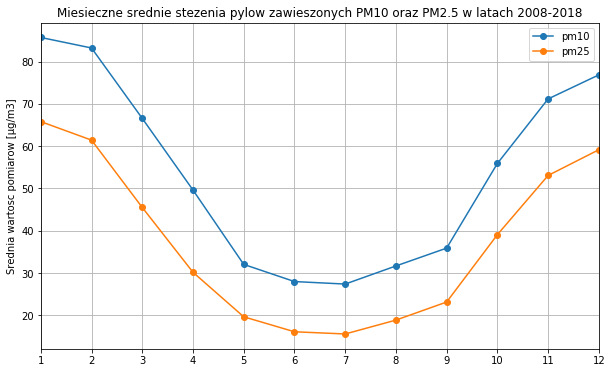

In [39]:
mean_by_month.plot(grid=True, figsize=(10, 6), marker='o')
plt.xticks(mean_by_month.index)
plt.title('Miesieczne srednie stezenia pylow zawieszonych PM10 oraz PM2.5 w latach 2008-2018')
plt.ylabel('Srednia wartosc pomiarow [µg/m3]')
plt.xlabel('')
plt.show();

**W okresie od maja do wrzesnia powietrze w Krakowie jest najczystrze.**

### Pytanie 7
**Jak ksztaltowaly sie poziomy zanieczyszczen w kolejnych latach (PM2.5)?**

In [40]:
years = range(2008, 2019)
df_years = pd.DataFrame()
for year in years:
    df_year = df.loc[str(year), ['pm25']].reset_index(drop=True)
    df_year.rename(columns={'pm25': year}, inplace=True)
    df_years = pd.concat([df_years, df_year], axis=1)

In [41]:
df_years.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,92.0,334.5,69.0,54.0,112.0,77.0,76.0,65.0,215.8730,119.915,21.34580
1,81.0,276.5,65.0,78.0,148.0,190.0,78.0,73.0,231.4550,177.442,84.90085
2,73.0,133.0,58.0,55.0,132.0,159.0,65.0,54.0,239.8225,178.942,67.44355
3,60.5,78.0,65.0,45.0,118.0,172.5,63.0,50.0,230.2770,174.770,76.66860
4,61.0,51.0,47.0,43.0,122.0,163.0,59.0,51.0,241.3810,154.054,64.96090


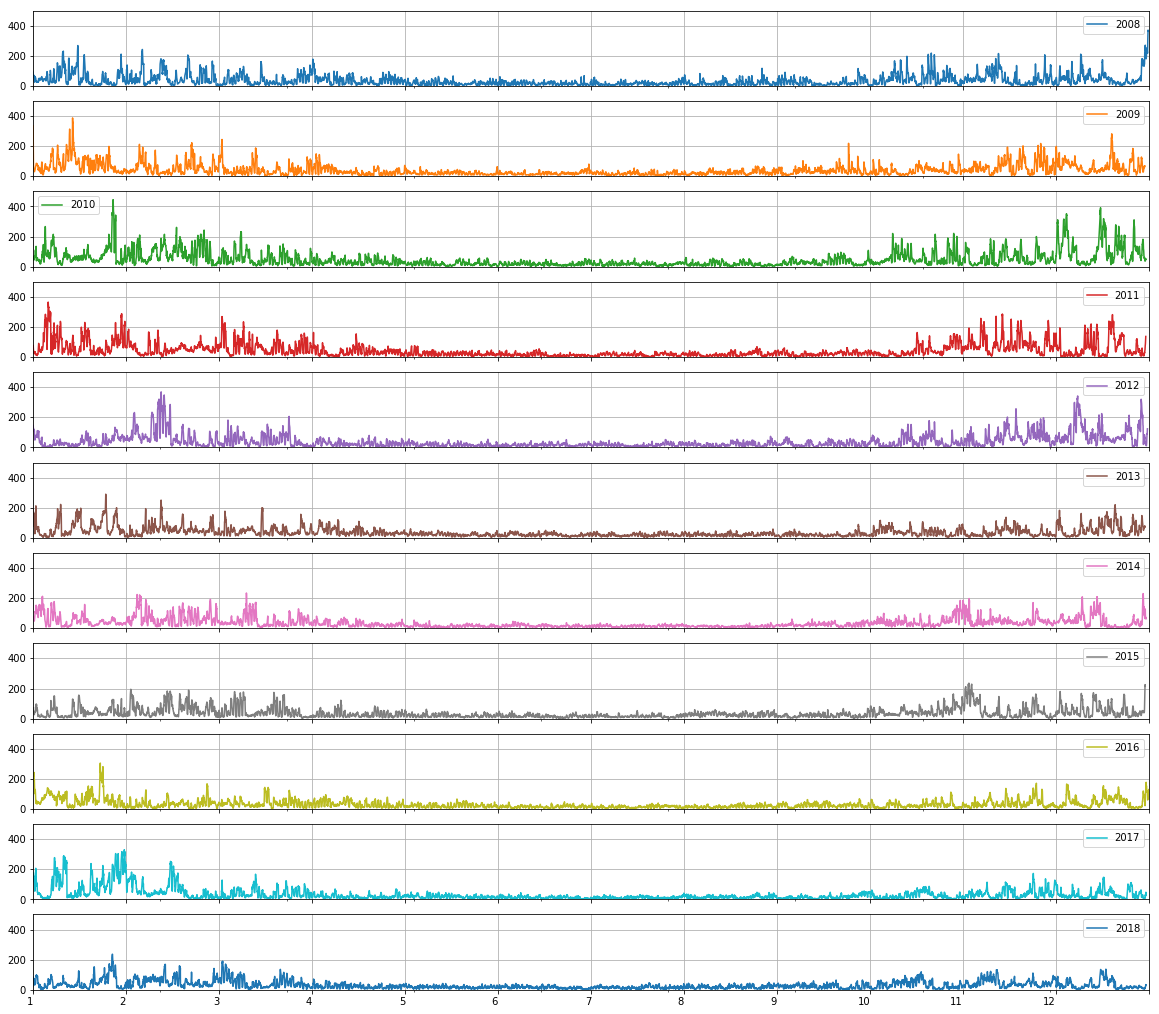

In [42]:
plots = df_years.plot(subplots=True, grid=True, figsize=(20, 20))
for plot in plots:
    plot.set_ylim(0, 500)
    plot.xaxis.set_major_locator(plt.LinearLocator(13))
    plot.set_xticklabels(range(1, 13), rotation=0)
plt.show();

### Pytanie 8
**Czy obserwujemy sezonowe zaleznosci stezenia PM2.5 na przestrzeni lat?**

In [43]:
dfts = df.pm25.copy().to_frame()
dfts['30D'] = dfts.pm25.rolling(window='30D').mean()
dfts['90D'] = dfts.pm25.rolling(window='90D').mean()
dfts.head()

,pm25,30D,90D
Datetime,,,
2008-01-01 01:00:00,92.0,92.000,92.000
2008-01-01 02:00:00,81.0,86.500,86.500
2008-01-01 03:00:00,73.0,82.000,82.000
2008-01-01 04:00:00,60.5,76.625,76.625
2008-01-01 05:00:00,61.0,73.500,73.500


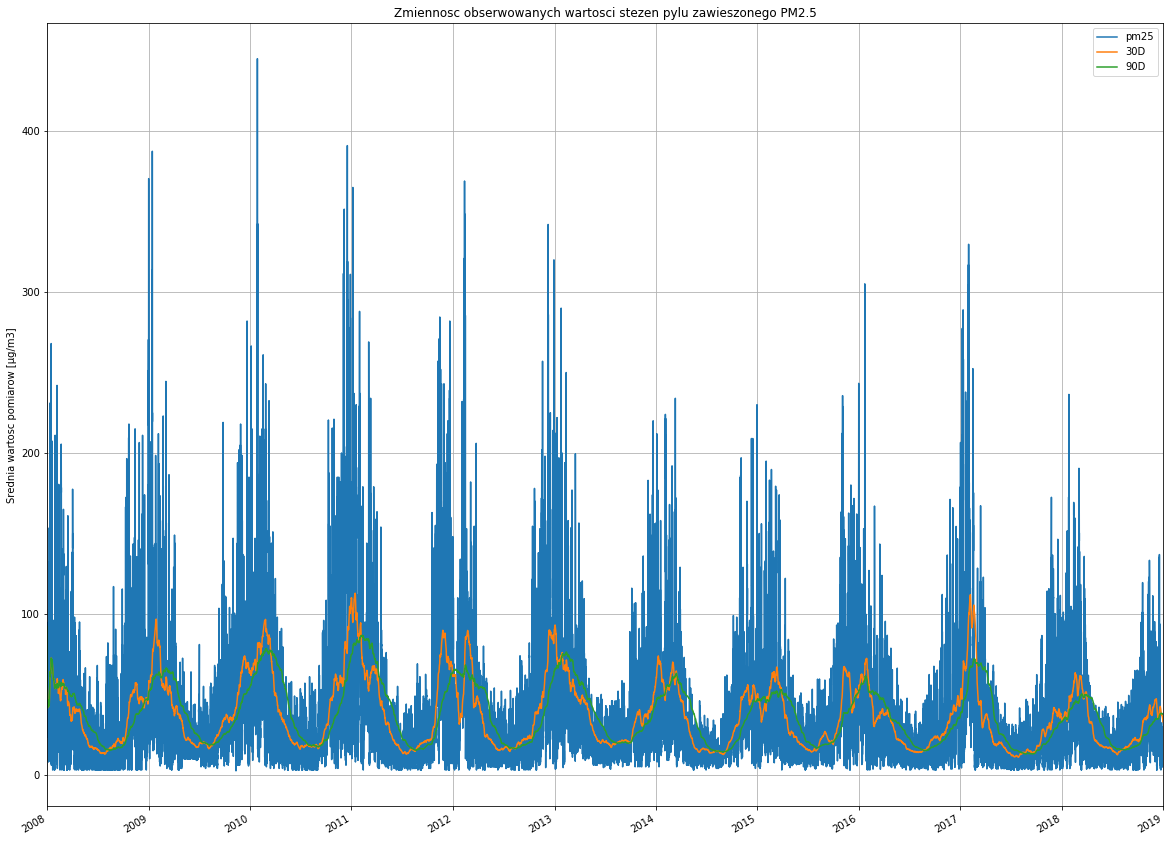

In [44]:
dfts.plot(grid=True, figsize=(20, 16))
plt.title('Zmiennosc obserwowanych wartosci stezen pylu zawieszonego PM2.5')
plt.ylabel('Srednia wartosc pomiarow [µg/m3]')
plt.xlabel('')
plt.show();